In [1]:
# Autism Spectrum Disorder (ASD) - Data Visualization and Pattern Understanding

# 1: Import Required Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore

# 2: Loading the Dataset
df = pd.read_excel("Cleaned_dataset.xlsx")  # Update the path accordingly

# 3: Dataset Overview
print("\nBasic Info:\n")
print(df.info())




Basic Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 704 entries, 0 to 703
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   A1_Score         704 non-null    int64 
 1   A2_Score         704 non-null    int64 
 2   A3_Score         704 non-null    int64 
 3   A4_Score         704 non-null    int64 
 4   A5_Score         704 non-null    int64 
 5   A6_Score         704 non-null    int64 
 6   A7_Score         704 non-null    int64 
 7   A8_Score         704 non-null    int64 
 8   A9_Score         704 non-null    int64 
 9   A10_Score        704 non-null    int64 
 10  age              704 non-null    int64 
 11  gender           704 non-null    object
 12  ethnicity        704 non-null    object
 13  jaundice         704 non-null    object
 14  autism           704 non-null    object
 15  country_of_res   704 non-null    object
 16  used_app_before  704 non-null    object
 17  result           704 

In [2]:
print("\nDescriptive Info:\n")
print(df.describe())


Descriptive Info:

         A1_Score    A2_Score    A3_Score    A4_Score    A5_Score    A6_Score  \
count  704.000000  704.000000  704.000000  704.000000  704.000000  704.000000   
mean     0.721591    0.453125    0.457386    0.495739    0.498580    0.284091   
std      0.448535    0.498152    0.498535    0.500337    0.500353    0.451301   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
50%      1.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
75%      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

         A7_Score    A8_Score    A9_Score   A10_Score         age      result  
count  704.000000  704.000000  704.000000  704.000000  704.000000  704.000000  
mean     0.417614    0.649148    0.323864    0.573864   29.690341    4.875000  
std      0

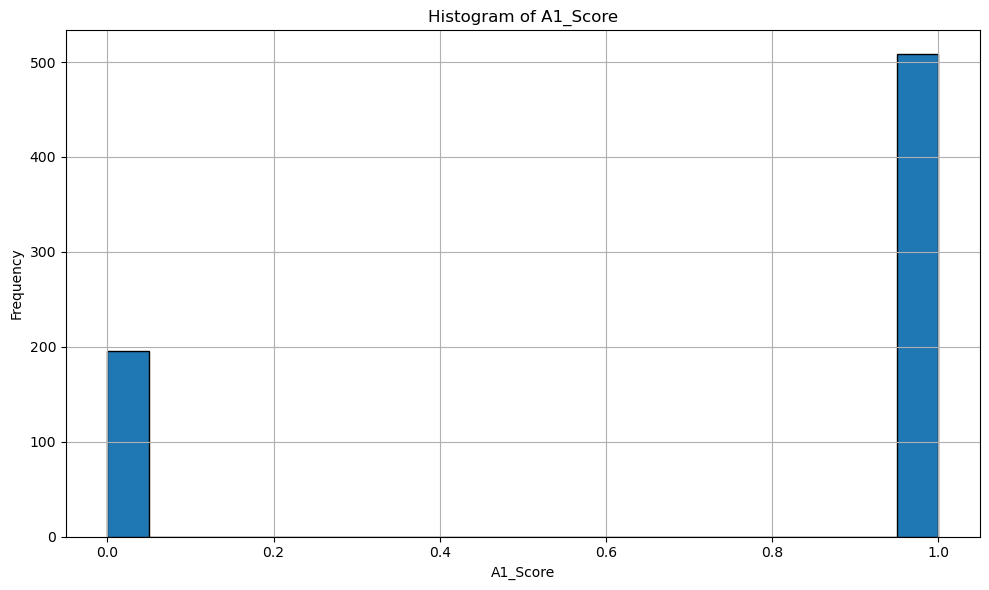

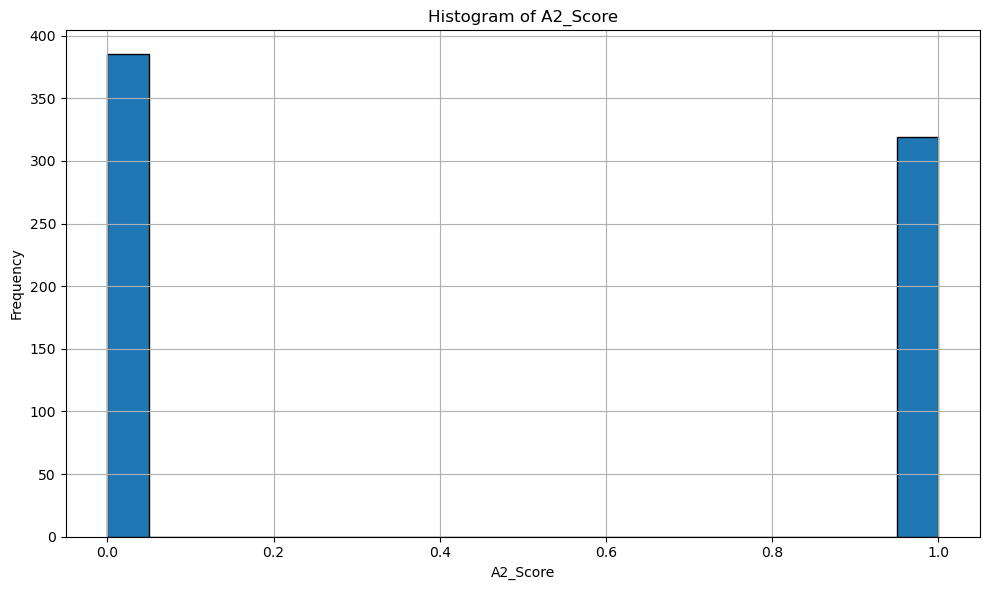

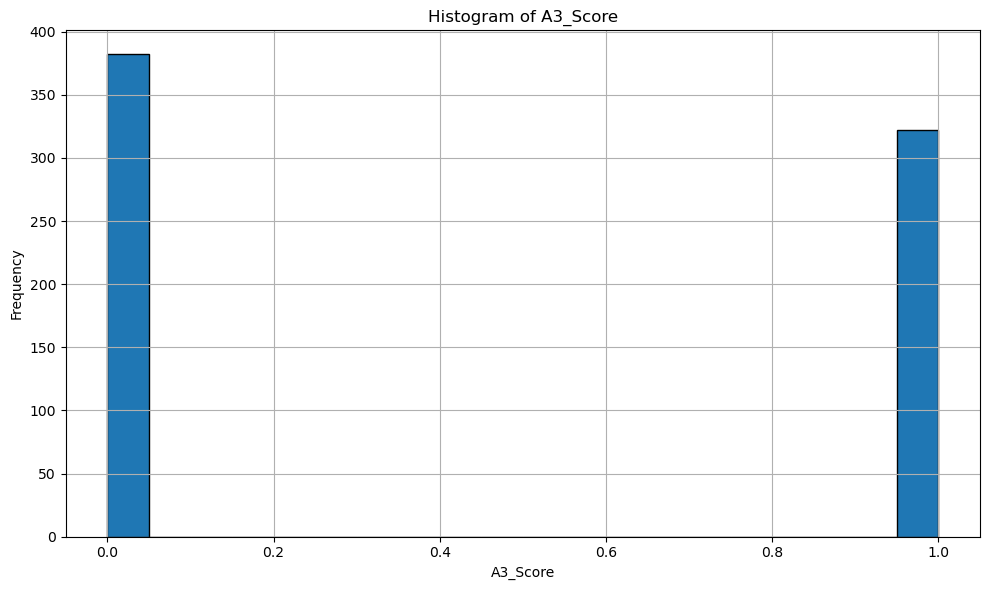

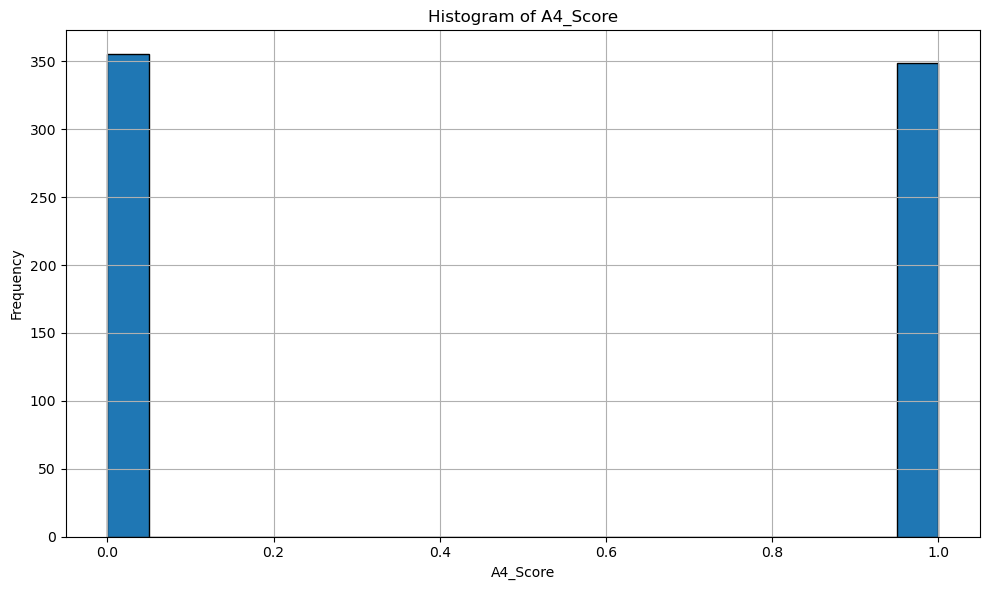

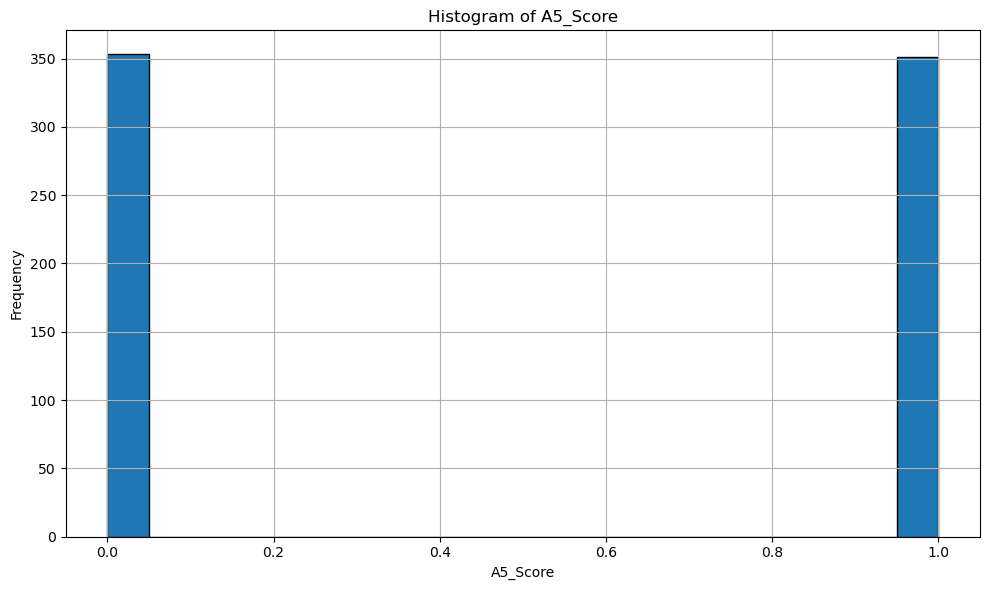

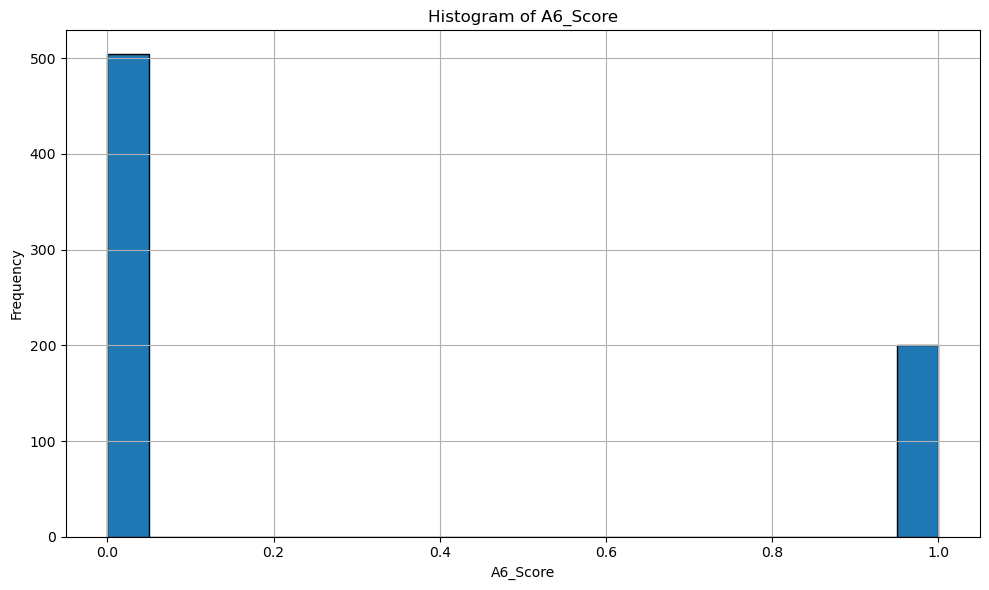

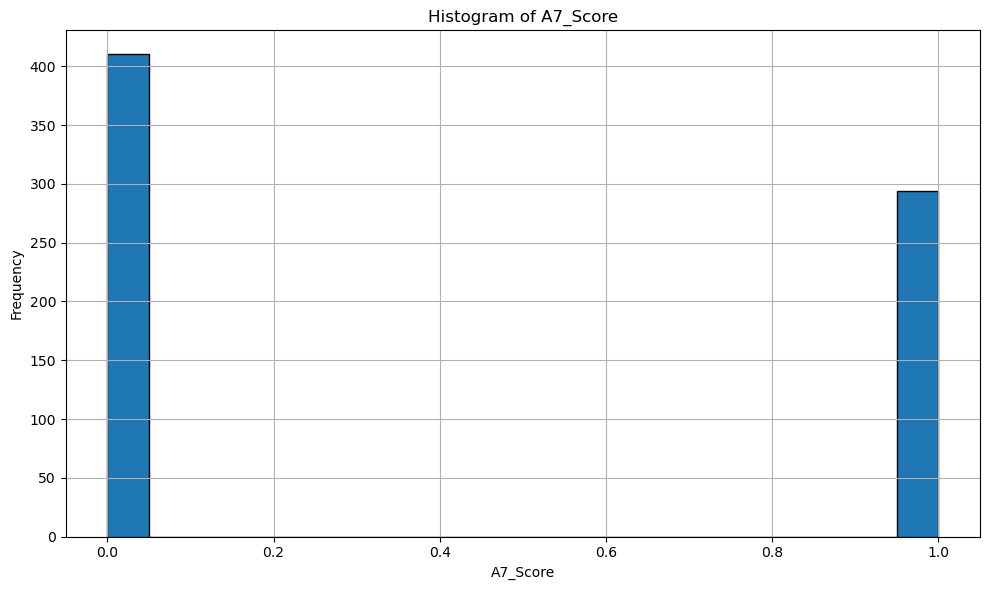

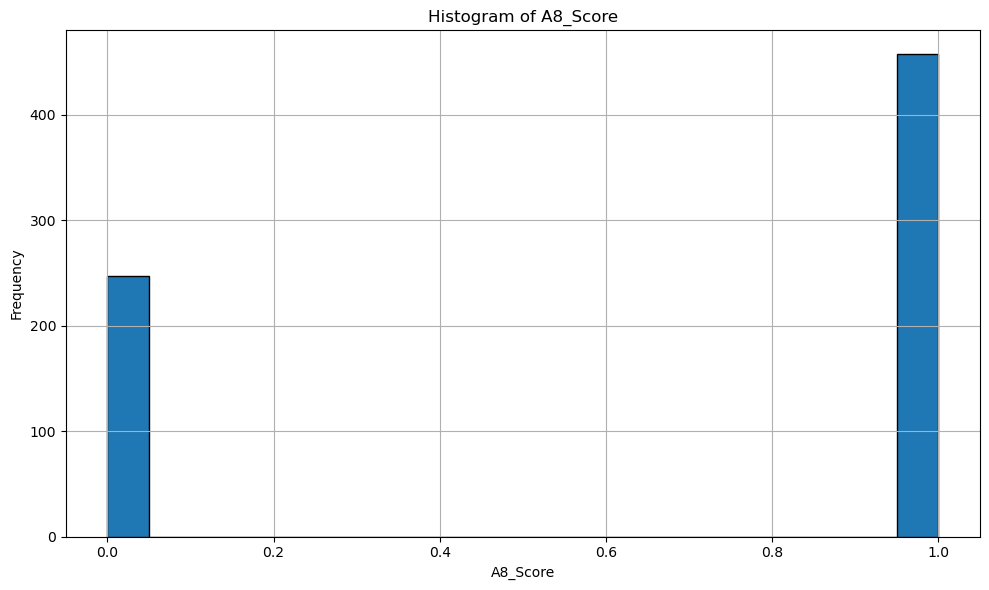

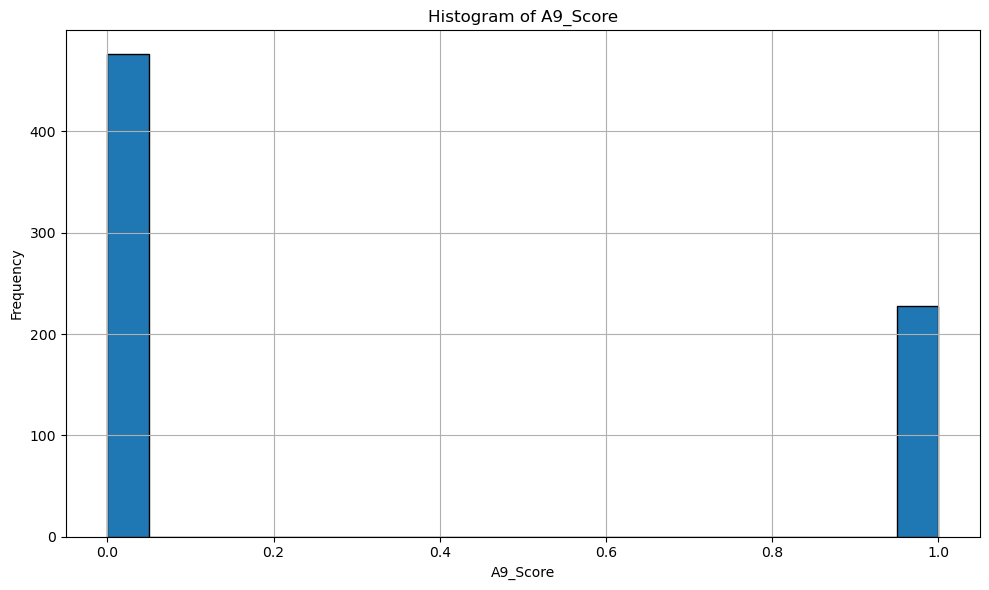

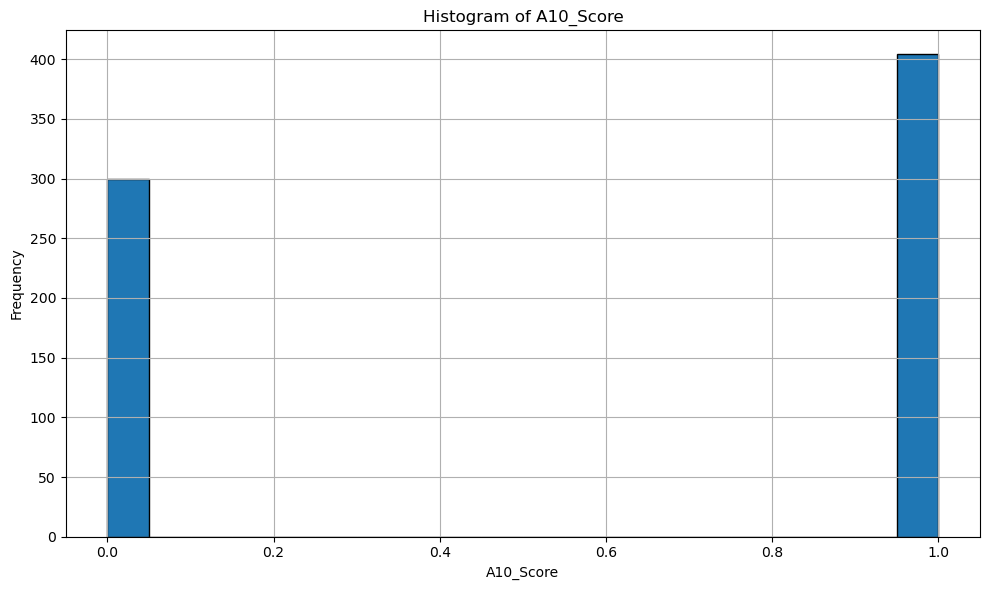

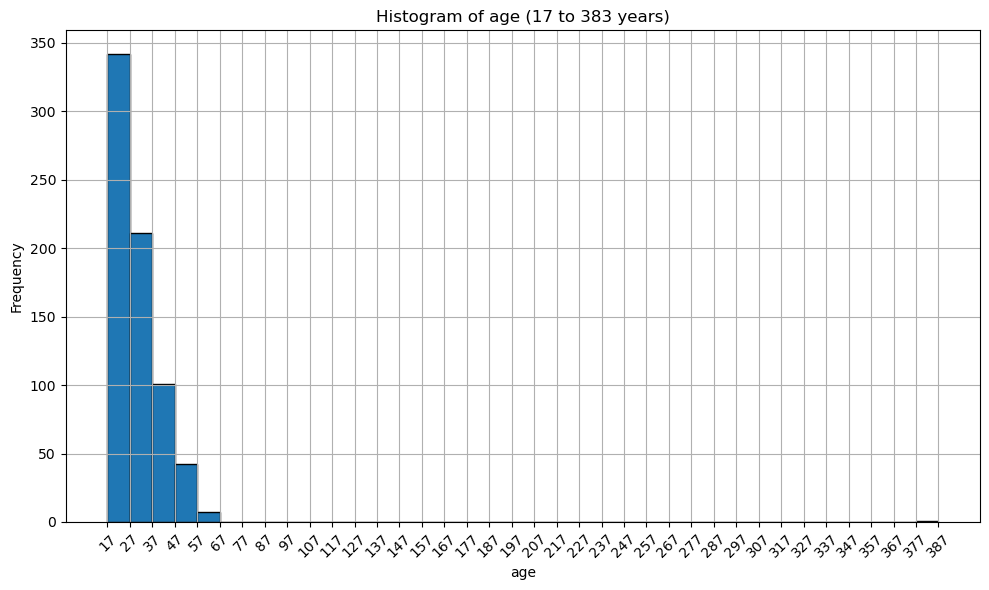

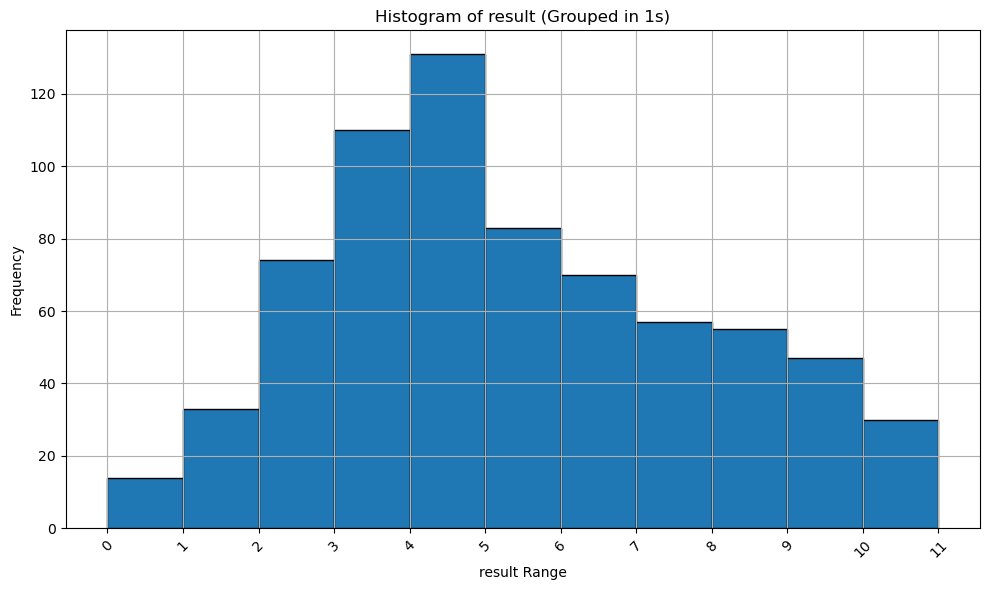

In [3]:
# 4: Histograms – Distribution of Features
for column in df.select_dtypes(include=['int64', 'float64']).columns:
    plt.figure(figsize=(10, 6))
    if column == 'age':
        bin_width = 10  # 1 cm = 10 years
        min_age = int(df[column].min())
        max_age = int(df[column].max())
        bins = list(range(min_age, max_age + bin_width, bin_width))
        plt.hist(df[(df[column] >= min_age) & (df[column] <= max_age)][column], 
                 bins=bins, edgecolor='black')
        plt.title(f"Histogram of {column} ({min_age} to {max_age} years)")
        plt.xlabel(column)
        plt.ylabel("Frequency")
        plt.grid(True)
        plt.xticks(bins, rotation=45, fontsize=10)
    elif column.lower() == 'result':
        bin_width = 1
        min_result = int(df[column].min())
        max_result = int(df[column].max()) + 1
        bins = [x for x in range(min_result, max_result + bin_width, bin_width)]
        plt.hist(df[column], bins=bins, edgecolor='black', align='mid')
        plt.title(f"Histogram of {column} (Grouped in 1s)")
        plt.xlabel(f"{column} Range")
        plt.ylabel("Frequency")
        plt.grid(True)
        plt.xticks(bins, rotation=45, fontsize=10)
    else:
        plt.hist(df[column], bins=20, edgecolor='black')
        plt.title(f"Histogram of {column}")
        plt.xlabel(column)
        plt.ylabel("Frequency")
        plt.grid(True)
    plt.tight_layout()
    plt.show()


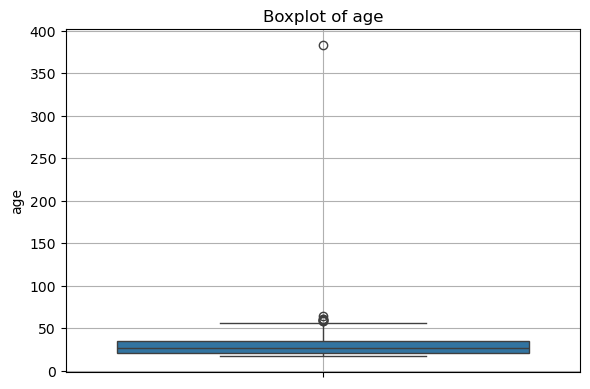

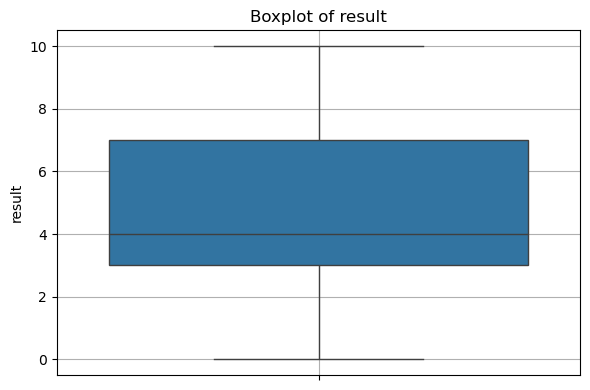

In [4]:
# 5: Box Plots – For age and result only
for column in ['age', 'result']:
    if column in df.columns:
        plt.figure(figsize=(6, 4))
        sns.boxplot(y=df[column])
        plt.title(f"Boxplot of {column}")
        plt.grid(True)
        plt.tight_layout()
        plt.show()


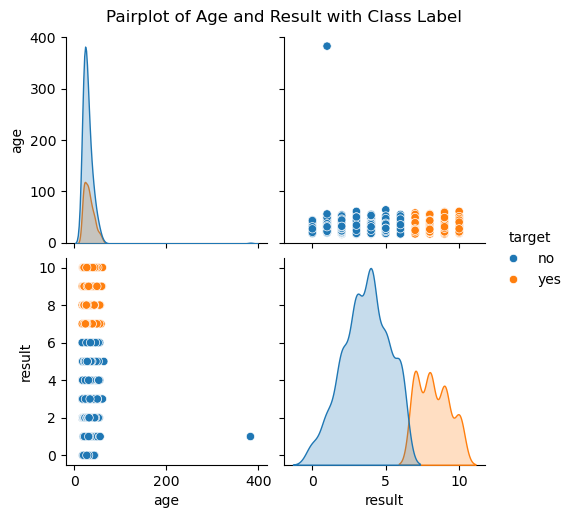

In [5]:
# 6: Pair Plot – Feature Interactions (only age, result, and target)
selected_columns = ['age', 'result', 'target']  

# Creating pairplot with KDE on diagonal
sns.pairplot(df[selected_columns], hue='target', diag_kind='kde')
plt.suptitle("Pairplot of Age and Result with Class Label", y=1.02)
plt.show()

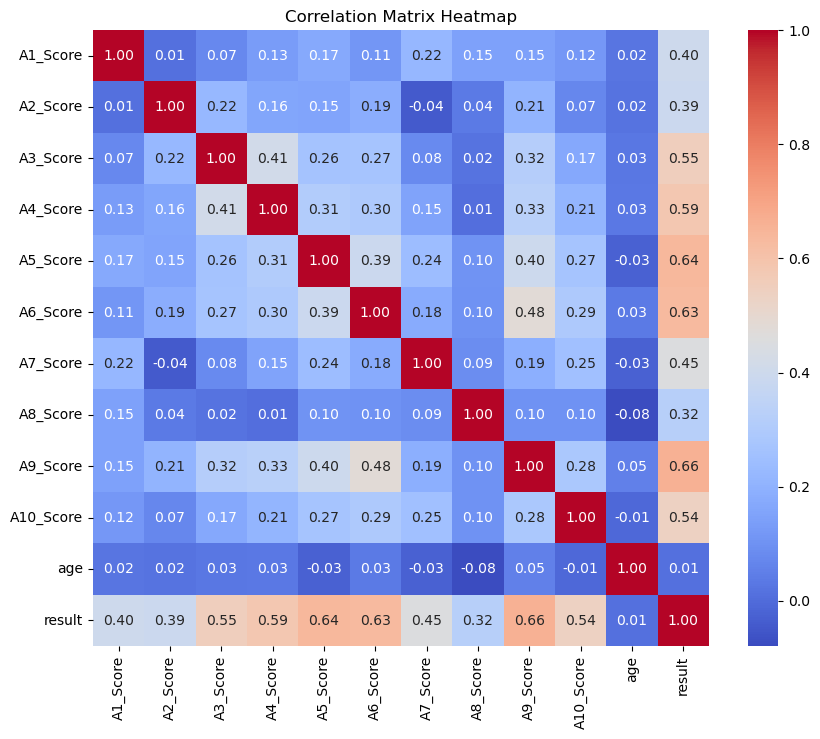

In [6]:
# Compute the correlation matrix
corr_matrix = df.corr(numeric_only=True)

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title("Correlation Matrix Heatmap")
plt.show()

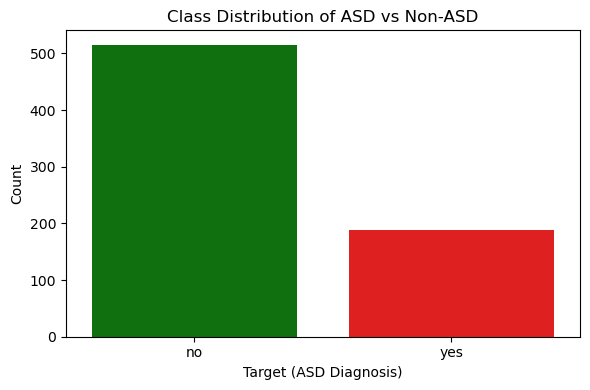


Class Distribution:

target
no     515
yes    189
Name: count, dtype: int64


In [7]:
# 🔍 Step 8: Check Class Imbalance with separate colors
plt.figure(figsize=(6, 4))

# Use hue and disable legend to avoid the FutureWarning
sns.countplot(
    x='target',
    hue='target',
    data=df,
    palette={'yes': 'red', 'no': 'green'},
    legend=False
)

plt.title("Class Distribution of ASD vs Non-ASD")
plt.xlabel("Target (ASD Diagnosis)")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

# Print class distribution
print("\nClass Distribution:\n")
print(df['target'].value_counts())

In [8]:
# 9: Detecting Outliers Using Z-Score
z_scores = df.select_dtypes(include=['int64', 'float64']).apply(zscore)
outliers = (z_scores.abs() > 3).sum()

print("\nNumber of outliers in each column:")
print(outliers)


Number of outliers in each column:
A1_Score     0
A2_Score     0
A3_Score     0
A4_Score     0
A5_Score     0
A6_Score     0
A7_Score     0
A8_Score     0
A9_Score     0
A10_Score    0
age          1
result       0
dtype: int64


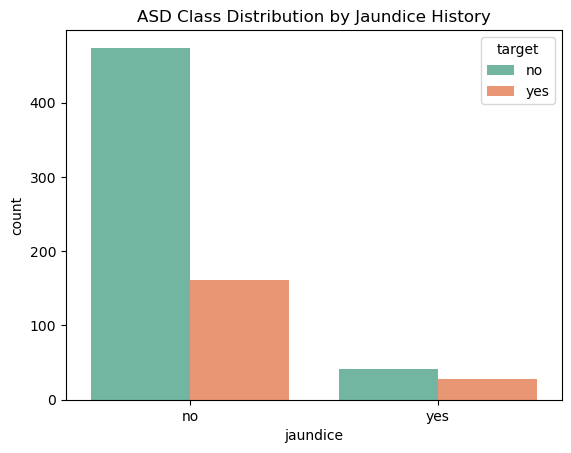

In [9]:
 # Comparing jaundice with ASD diagnosis:
sns.countplot(x='jaundice', hue='target', data=df, palette='Set2')
plt.title("ASD Class Distribution by Jaundice History")
plt.show()

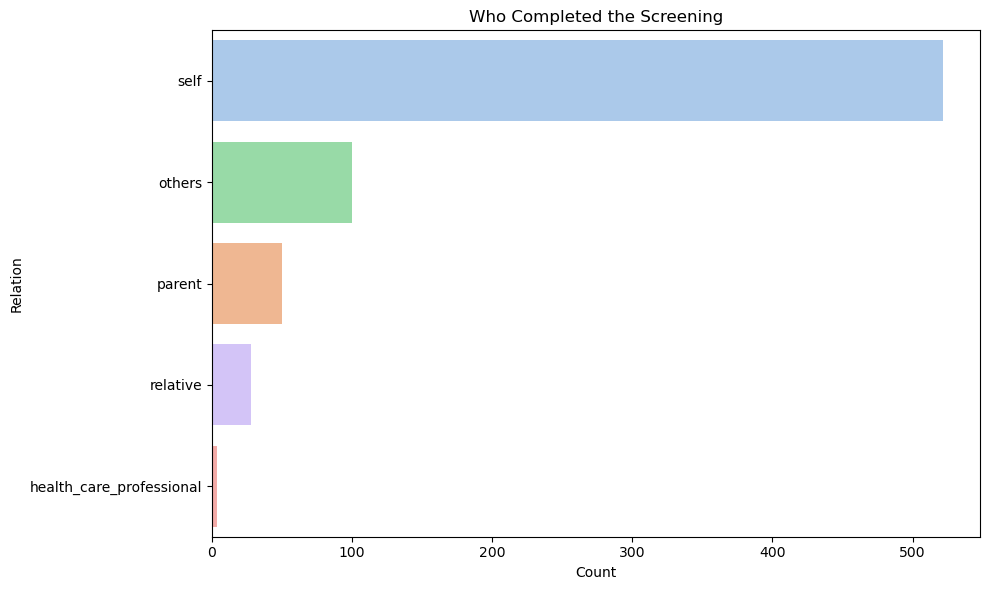

In [10]:
plt.figure(figsize=(10, 6))
sns.countplot(
    y='relation',
    hue='relation',
    data=df,
    order=df['relation'].value_counts().index,
    palette='pastel',
    legend=False  # hide duplicate legend
)
plt.title("Who Completed the Screening")
plt.xlabel("Count")
plt.ylabel("Relation")
plt.tight_layout()
plt.show()

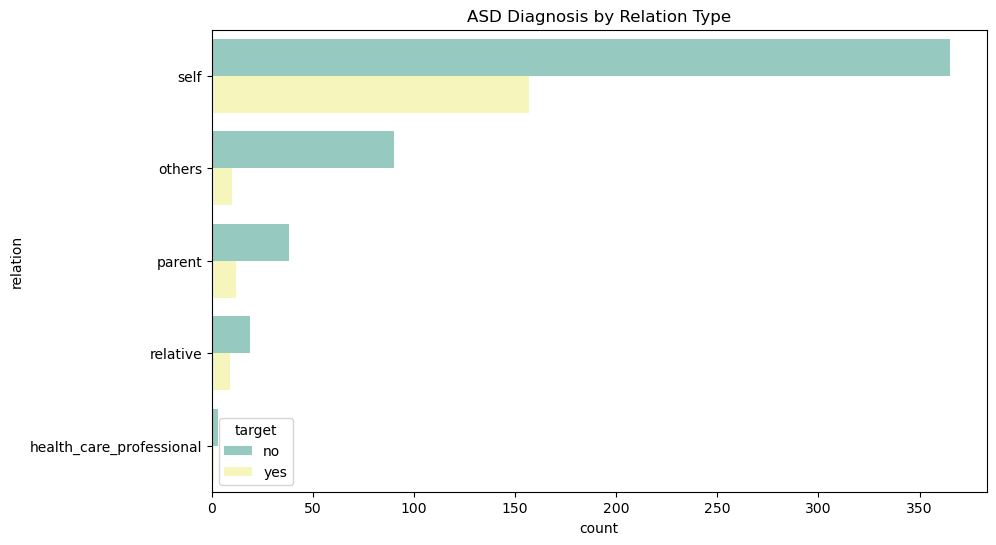

In [11]:
# Comparing relation type with target:
plt.figure(figsize=(10, 6))
sns.countplot(y='relation', hue='target', data=df, palette='Set3',
              order=df['relation'].value_counts().index)
plt.title("ASD Diagnosis by Relation Type")
plt.show()

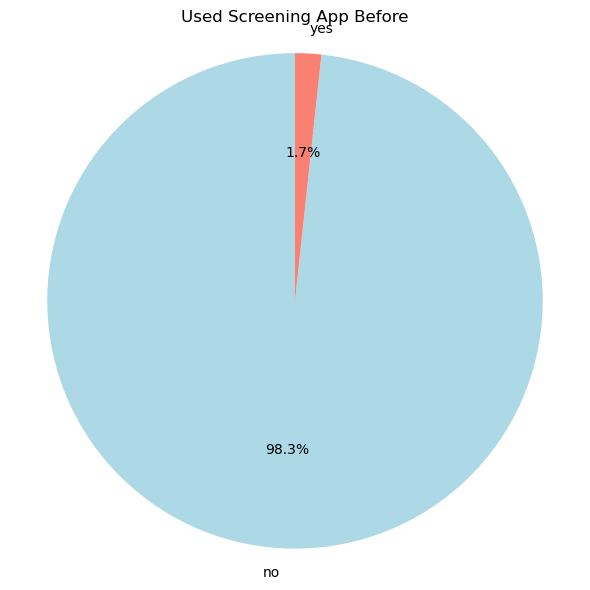

In [12]:
# No.of people used app before and no. of people who did'nt use the app before 
import matplotlib.pyplot as plt

# Get value counts
app_usage = df['used_app_before'].value_counts()

# Pie chart
plt.figure(figsize=(6, 6))
plt.pie(app_usage, labels=app_usage.index, autopct='%1.1f%%', startangle=90, colors=['lightblue', 'salmon'])
plt.title("Used Screening App Before")
plt.axis('equal')  # Equal aspect ratio makes the pie a circle
plt.tight_layout()
plt.show()

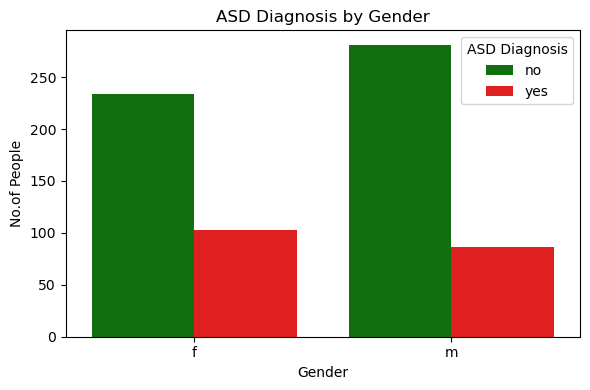

In [13]:
# gender vs target
plt.figure(figsize=(6, 4))
sns.countplot(x='gender', hue='target', data=df, palette={'yes': 'red', 'no': 'green'})
plt.title("ASD Diagnosis by Gender")
plt.xlabel("Gender")
plt.ylabel("No.of People")
plt.legend(title="ASD Diagnosis")
plt.tight_layout()
plt.show()

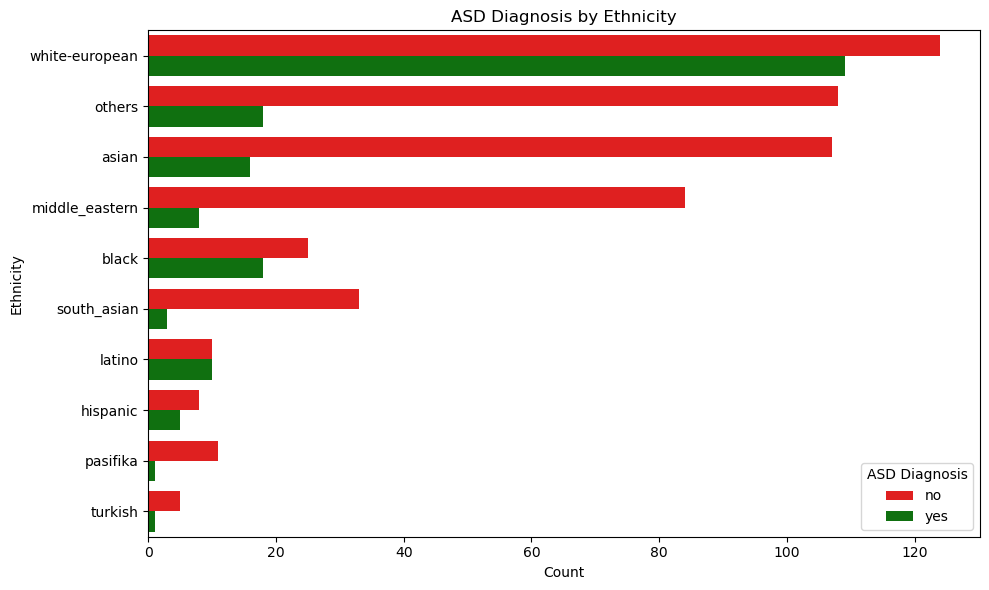

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate how many ethnicities
eth_count = df['ethnicity'].nunique()

# Set dynamic figure height (e.g., 0.6 inch per ethnicity)
plt.figure(figsize=(10, eth_count * 0.6))

# Sort by frequency
sns.countplot(
    y='ethnicity',
    hue='target',
    data=df,
    order=df['ethnicity'].value_counts().index,
    palette={'yes': 'green', 'no': 'red'}
)

plt.title("ASD Diagnosis by Ethnicity")
plt.xlabel("Count")
plt.ylabel("Ethnicity")
plt.legend(title="ASD Diagnosis")
plt.tight_layout()
plt.show()

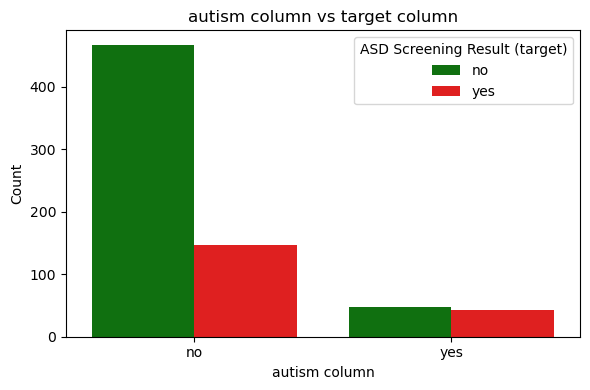

In [15]:
# autism column vs target column
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
sns.countplot(x='autism', hue='target', data=df, palette={'yes': 'red', 'no': 'green'})

plt.title("autism column vs target column")
plt.xlabel("autism column")
plt.ylabel("Count")
plt.legend(title="ASD Screening Result (target)")
plt.tight_layout()
plt.show()